In [3]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

conn = sqlite3.connect('../../../data/nfp2/nfp2_combined.db')  # Adjust the path to your database file

# Step 2 & 3: Query the database and load the data into a pandas DataFrame
query = "SELECT * FROM stellarators_combined"  # Adjust your query as needed
data_df = pd.read_sql_query(query, conn)

data_df_clean = data_df[data_df['convergence'] == 1]
data_df_clean = data_df_clean.dropna(subset=['quasiisodynamic'])


X = data_df_clean[['rbc_1_0', 'rbc_m1_1', 'rbc_0_1', 'rbc_1_1','zbs_1_0', 'zbs_m1_1', 'zbs_0_1', 'zbs_1_1']] 
Y = np.log(data_df_clean['quasiisodynamic'])

features_no_outliers, test_features_no_outliers, target_no_outliers, test_target_no_outliers = train_test_split(X, Y, test_size=0.2, random_state=42)


from lightgbmlss.model import *
from lightgbmlss.distributions.Weibull import *
import lightgbm as lgb
import numpy as np



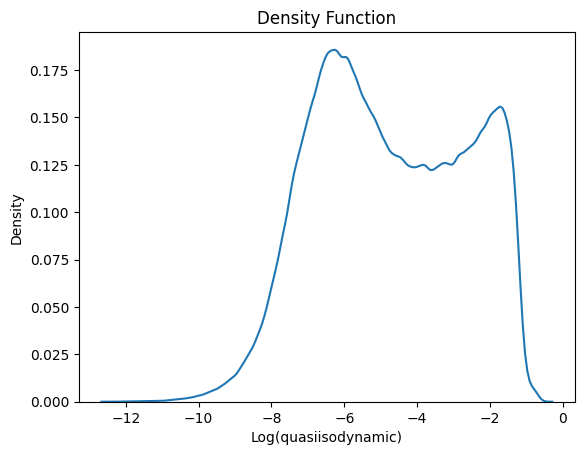

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.kdeplot(target_no_outliers, bw_adjust=0.5)
plt.title('Density Function')
plt.xlabel('Log(quasiisodynamic)')
plt.ylabel('Density')
plt.show()


Fitting of candidate distributions completed: 100%|██████████| 8/8 [08:50<00:00, 66.32s/it]         


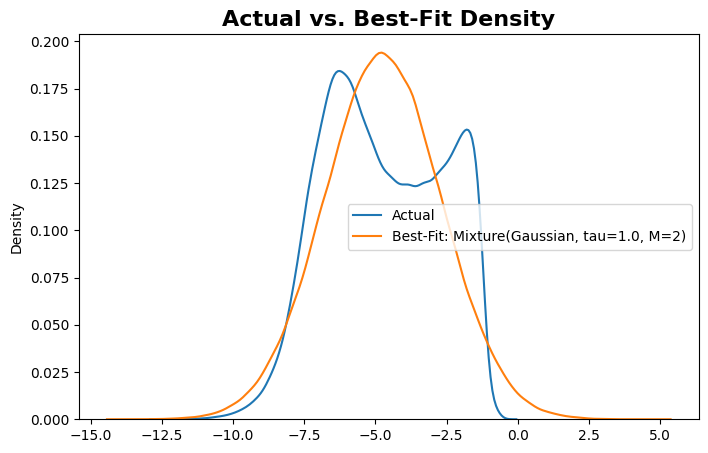

In [7]:
from lightgbmlss.model import *
from lightgbmlss.distributions.Gaussian import *
from lightgbmlss.distributions.Mixture import *
from lightgbmlss.distributions.mixture_distribution_utils import MixtureDistributionClass

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotnine
from plotnine import *
plotnine.options.figure_size = (10, 5)

# Initialize the MixtureDistributionClass
mix_dist_class = MixtureDistributionClass()

# Define the candidate distributions
candidate_distributions = [
    Mixture(Gaussian(response_fn="softplus"), M=2),
    Mixture(Gaussian(response_fn="softplus"), M=3),
    Mixture(Gaussian(response_fn="softplus"), M=4),
    Mixture(Gaussian(response_fn="softplus"), M=5),
    Mixture(Gaussian(response_fn="softplus"), M=6),
    Mixture(Gaussian(response_fn="softplus"), M=7),
    Mixture(Gaussian(response_fn="softplus"), M=8),
    Mixture(Gaussian(response_fn="softplus"), M=9),
]

# Assuming target_no_outliers_np is your data for comparison
target_no_outliers_np = np.array(target_no_outliers)

# Selecting the best distribution based on negative log-likelihood
dist_nll = mix_dist_class.dist_select(target=target_no_outliers_np, candidate_distributions=candidate_distributions, max_iter=50, plot=True, figure_size=(8, 5))

